# Proyecto de Robótica - Verano 2023


*   Miguel Ángel Paz
*   Luis Ramón Guajardo
*   Jafet Castañeda
*   Andrés Suro



# Generación del Laberinto

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np

# Definimos el laberinto

In [ ]:
class Obstacle:
  pos = ''
  width = ''
  height = ''

  def __init__(self, p, w, h):
    self.pos = p
    self.width = w
    self.height = h


In [ ]:
obstacles = []
wt = 0.25/2

#Paredes del laberinto
obstacles.append(Obstacle((2-wt,0), 0.25, 2 + wt))
obstacles.append(Obstacle((2+wt, 2-wt), 2, 0.25))

obstacles.append(Obstacle((0, 4-wt), 4-wt, 0.25))
obstacles.append(Obstacle((4-wt, 4-wt), 0.25, 2 + 2*wt))
obstacles.append(Obstacle((2-wt, 6-wt), 2, 0.25))

obstacles.append(Obstacle((6-wt, 6-wt), 0.25, 2 + 2*wt))

obstacles.append(Obstacle((6-wt, 2-wt), 0.25, 2 + 2*wt))
obstacles.append(Obstacle((6+wt, 4-wt), 2-wt, 0.25))

In [ ]:
liminf_X = 0
limsup_X = 8
liminf_Y = 0
limsup_Y = 8

radio_robot = 0.25
x_init = np.array([1,6])

## Creacion de puntos aleatorios

In [ ]:
puntos=[[]]
for i in range(0,16):
  puntos.append([])
  #print("x:",i, (i%4)*2, i+1, (i%4 +1)*2)
  #print("y:",i/4, 2*int(i/4), (i+1)/4+1, 2*(int(i/4)+1))
  #print()
  while(len(puntos[i])!=10):
    a=np.random.uniform(2*(i%4)+radio_robot, 2*(i%4 +1)-radio_robot)

    b=np.random.uniform(2*(int(i/4)%5)+radio_robot, 2*((int(i/4)+1)%5)-radio_robot)
    if sampleFree(a,b,radio_robot):
      punto =  np.array([a,b])
      puntos[i].append(punto)


In [ ]:
print(puntos[10])
len(puntos[10])

[array([5.01203756, 5.20281575]), array([4.72525323, 4.2832653 ]), array([5.39930681, 5.59339749]), array([5.19142773, 4.59529632]), array([4.96674107, 4.29935852]), array([4.98043288, 5.61722722]), array([5.00372854, 4.56825641]), array([5.68712962, 5.32257756]), array([5.16159357, 4.51257927]), array([4.70964123, 4.85641935])]


10

## Lectura de puntos aleatorios

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
initialPoints = []

with open("initialPoints.txt", 'r') as file:
    for linea in file:
        x, y = map(float, linea.split())
        initialPoints.append(np.array([x, y]))

In [ ]:
initialPoints[0]
len(initialPoints)

160

## Puntos aleatorios recibidos

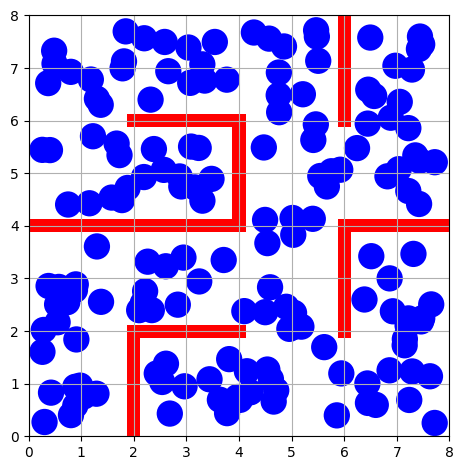

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(liminf_X, limsup_X)
ax.set_ylim(liminf_Y, limsup_Y)

for i in range(len(obstacles)):
  ax.add_patch(Rectangle(obstacles[i].pos, obstacles[i].width, obstacles[i].height,
             facecolor = 'red',
             fill=True))


#circle_patch = Circle(x_init, radio_robot, facecolor='blue')
#ax.add_patch(circle_patch)


for punto in initialPoints:
  circle_patch = Circle(punto, radio_robot, facecolor='blue')
  ax.add_patch(circle_patch)


plt.grid()
ax.set_aspect('equal')
plt.tight_layout()

plt.show()

# Primitive Functions

## Colisiones de puntos

In [ ]:
# CIRCLE/RECTANGLE
def circleRect(cx,cy,radius, rx, ry, rw, rh):

  # temporary variables to set edges for testing
  testX = cx;
  testY = cy;

  # which edge is closest?
  if (cx < rx):
    testX = rx      # test left edge
  elif (cx > rx+rw):
    testX = rx+rw   # right edge
  if (cy < ry):
    testY = ry      # top edge
  elif (cy > ry+rh):
    testY = ry+rh   # bottom edge

  # get distance from closest edges
  distX = cx-testX
  distY = cy-testY
  distance = np.sqrt((distX*distX) + (distY*distY))

  # if the distance is less than the radius, collision!
  if (distance <= radius):
    return True

  return False


def sampleFree(x,y,r):

  if x+r > limsup_X or x-r < liminf_X:
    return False

  if y+r > limsup_Y or y-r < liminf_Y:
    return False

  for rec in obstacles:
    rx = rec.pos[0]
    ry = rec.pos[1]
    rw = rec.width
    rh = rec.height

    if circleRect(x,y,r, rx, ry, rw, rh) == True:
      return False

  return True

In [ ]:
sampleFree(0.3, 0.3, 1)

False

## Colisiones de Objetos

In [ ]:
def collisionFree(x1, y1, x2, y2, r):
  for rec in obstacles:
    #Parametros del obstaculo (rectangulo)
    rx = rec.pos[0]
    ry = rec.pos[1]
    rw = rec.width
    rh = rec.height

    numSamples = 10

    for i in range(numSamples+1):
      xm = (x2-x1)*(i/numSamples)+x1
      ym = (y2-y1)*(i/numSamples)+y1
      #Si un circulo de la muestra no es libre de colision,
      #regresamos que la trayectoria no es posible
      if sampleFree(xm,ym,r) == False:
        return False


  return True

In [ ]:
collisionFree(3.1,5,5,5, 0.25)

False

## Near Function

In [ ]:
def Near(V, x, y, r):
  B = []

  for v in V:
    v = np.array(v)
    u = np.array([x, y])
    if np.linalg.norm(u - v) < r:
      #print(np.linalg.norm(u - v))
      B.append(v)
  return B

## Nearest Function

In [ ]:
def Nearest(V,x,y):
  vmin=np.array([np.inf,np.inf])
  for v in V:
    v = np.array(v)
    u = np.array([x, y])
    if np.linalg.norm(u - v)< np.linalg.norm(vmin- u):
      vmin=v

  return vmin

## Steer Function

In [ ]:
def Steer(x1,y1,x2,y2,eta):
  u = np.array([x1,y1])
  v = np.array([x2,y2])

  p = (v-u)/np.linalg.norm(u-v)
  return u + eta*p

# Algoritmo

In [ ]:
def SamplePoint():
  while(1):
    a=np.random.uniform(liminf_X+radio_robot, limsup_X-radio_robot)
    b=np.random.uniform(liminf_Y+radio_robot, limsup_Y-radio_robot)
    if sampleFree(a,b,radio_robot):
      return np.array([a,b])


In [ ]:
def Regionmeta(x,i):

  if(2*(i%4)+radio_robot<=x[0] and x[0]<= 2*(i%4 +1)-radio_robot):
    if (2*(int(i/4)%5)+radio_robot<=x[1] and x[1]<=2*((int(i/4)+1)%5)-radio_robot):
      return True

  return False

In [ ]:
#Regresa al area de X_free
def mu():
  X = limsup_X * limsup_Y

  for rec in obstacles:
    X -= rec.width * rec.height

  #print(X)
  return X

In [ ]:
def RRG_algorithm(x_init, samples, radio_robot, eta):
  V=[]
  V.append(x_init)
  E=[]
  Vecinos= [[]]

  n=samples
  while(len(V)<samples):
    x_rand = SamplePoint()
    x_nearest = Nearest(V,x_rand[0],x_rand[1])
    #print("xrand:",x_rand)
    #print("xnear:",x_nearest)
    x_new = Steer(x_nearest[0],x_nearest[1],x_rand[0],x_rand[1],eta)
    #print("xnew:",x_new)

    if collisionFree(x_nearest[0],x_nearest[1], x_new[0], x_new[1], radio_robot) and sampleFree(x_new[0],x_new[1],radio_robot):

      gamma_RRG = 2*(1+1/2)**(1/2)*(mu()/np.pi)**(1/2)
      sampleradio = min( gamma_RRG*(np.log(len(V))/len(V))**(1/2) ,eta)
      #sampleradio = gamma_RRG *(np.log(len(V))/len(V))**(1/2)
      #print("sratio:",sampleradio)
      X_near = Near(V,x_new[0],x_new[1], sampleradio)
      V.append(x_new)
      E.append([x_nearest,x_new])
      Vecinos.append([])
      xnew_id = np.where((V == x_new).all(axis=1))[0][0]
      xnearest_id = np.where((V == x_nearest).all(axis=1))[0][0]
      Vecinos[xnew_id].append(xnearest_id)
      Vecinos[xnearest_id].append(xnew_id)

      #E.append([x_new,x_nearest])
      #u,v=E[-1]
      #print("dist:",np.sqrt((u[0]-v[0])**2+(u[1]-v[1])**2))

      for x_near in X_near:
        if collisionFree(x_near[0],x_near[1], x_new[0],x_new[1], radio_robot):
          E.append([x_near,x_new])
          xnear_id = np.where((V == x_near).all(axis=1))[0][0]
          Vecinos[xnew_id].append(xnear_id)
          Vecinos[xnear_id].append(xnew_id)
          #u,v=E[-1]
          #print("distX:",np.sqrt((u[0]-v[0])**2+(u[1]-v[1])**2))
          #E.append([x_new, x_near])

  return V,E, Vecinos

In [ ]:
import numpy as np
import math
import random

def distancia_euclidiana(punto1, punto2):
    return np.linalg.norm(punto2 - punto1)

def dijkstra(V, E, Vecinos, inicio, regionmeta):
    V=np.array(V)
    #Distancias
    distancias = []
    for v in V:
      distancias.append(np.inf)
    #print("D:",distancias)
    id = np.where((V == inicio).all(axis=1))[0][0]
    #print("id:",id)
    distancias[id] = 0

    #Visitados
    visitados = []
    for v in V:
      visitados.append(False)

    #Padres
    padres = {tuple(punto): None for punto in V}


    Q = set()
    i=0
    for v in V:
      Q.add(i)
      i+=1


    #while any(not visitado for visitado in visitados.values()):
    while( len(Q)) :
        #print("Q:",len(Q))
        #Minima distancia en Q
        actual_id= random.choice(tuple(Q))
        for q in Q:
            if distancias[q]<distancias[actual_id] :
              actual_id = q
        visitados[actual_id] = True

        if distancias[actual_id] == np.infty:
          break

        #if actual_id == np.where((V == fin).all(axis=1))[0][0]:
        #    break
        if Regionmeta(V[actual_id], regionmeta):
          break

        Q.remove(actual_id)

        for v in Vecinos[actual_id]:
            distancia = distancias[actual_id] + distancia_euclidiana(V[actual_id], V[v])
            #print("dist:",distancia, "dists:",distancias[v], "v:",v)
            if distancia < distancias[v]:
              distancias[v] = distancia
              padres[tuple(V[v])] = tuple(V[actual_id])

    fin= V[actual_id]
    if padres[tuple(fin)] is None:
        return None, np.inf  # No hay camino hasta el punto final

    # Construir el camino óptimo
    camino = [fin]
    actual = tuple(fin)
    while actual != tuple(inicio):
        actual = padres[actual]
        camino.append(actual)
    camino.reverse()

    return camino, distancias[np.where((V == fin).all(axis=1))[0][0]]


In [ ]:
def optimalPath(V,E, Vecinos, inicio, regionmeta):
  #print(inicio, fin)
  inicio=Nearest(V,inicio[0],inicio[1])
  #fin=Nearest(V,fin[0],fin[1])
  camino_optimo, distancia_recorrida = dijkstra(V, E, Vecinos, inicio, regionmeta)
  if camino_optimo is None:
    pass
    #print("No hay camino desde el punto de inicio al punto final.")
  else:
    pass
    #print("Camino óptimo:", camino_optimo)
    #print("Distancia recorrida:", distancia_recorrida)

  return camino_optimo, distancia_recorrida

Creacion de 100 puntos aleatorios nuevos

In [ ]:
Puntos_al=[]
for i in range(100):
  punto1=SamplePoint()
  punto2=SamplePoint()
  Puntos_al.append([punto1[0],punto1[1], punto2[0], punto2[1]])

# Guardar los datos en un archivo de texto
np.savetxt('Puntos_aleatorios_Neurona.txt', Puntos_al)

print("Datos guardados en el archivo 'Puntos_aleatorios_Neurona.txt'")


Datos guardados en el archivo 'Puntos_aleatorios_Neurona.txt'


In [ ]:
# Leer los datos del archivo de texto
arreglos_leidos = np.loadtxt('Puntos_aleatorios_Neurona.txt')

Puntos_Prueba=[]

# Imprimir los arreglos leídos
print("Arreglos leídos del archivo:")
for arreglo in arreglos_leidos:
    Puntos_Prueba.append(arreglo)
    print(arreglo)



Arreglos leídos del archivo:
[0.52487734 0.74404224 5.80209241 4.4399534 ]
[7.07208366 1.42891251 0.67212556 0.59518626]
[5.86988382 4.58690591 4.33915045 7.12155994]
[1.11308728 0.82414198 3.356034   2.62791461]
[0.89811852 2.82971072 3.22546021 1.44259316]
[0.41975564 3.09936053 6.56694507 1.993346  ]
[0.41480476 7.31585381 2.54109136 4.40642506]
[5.41210812 5.10176324 4.37874955 4.59320382]
[0.41937678 2.63836201 2.72223078 4.93395264]
[0.77897214 0.83696132 4.2982497  6.81464969]
[6.30807009 4.71106308 4.25711603 0.76985741]
[6.78477974 1.74544338 2.2065893  6.9043654 ]
[0.40625173 2.2292443  7.09718204 5.20276405]
[4.85527483 3.83081403 0.57710047 0.48539144]
[5.04402371 1.20168348 6.76556132 7.58802184]
[7.23520134 5.75913352 6.94181338 6.39018322]
[4.41971426 7.25411222 6.66349378 4.85951616]
[1.75621813 4.89082966 0.549699   6.56199793]
[0.40770758 7.68203098 7.57224701 7.14575921]
[2.96974334 7.5866397  2.62048311 0.78488347]
[2.5243499  7.47075618 6.88347515 5.07880398]
[2.65

## Escritura de trayectorias

In [ ]:
# Nombre del archivo
nombre_archivo = 'Paths_99.txt'

# Escribir las listas en el archivo de texto
with open(nombre_archivo, 'w') as archivo:

  i=10
  for m in range(i+0,i+10):
    punto in initialPoints[m]
    samples = 1000
    V,E, Vecinos = RRG_algorithm(punto, samples,radio_robot,0.8)
    for k in range(0,16):
      if (1 !=k):
        Path, distance = optimalPath(V,E, Vecinos,punto, k)
        for dot in Path:
            archivo.write(f'{dot[0]},{dot[1]}\n')
        archivo.write('\n')  # Separación entre las listas

        print("k:",k, end=' ')
    i+=1
    print("Punto ",i, " completado.")

NameError: ignored

## Lectura de trayectorias

In [ ]:
All_Paths=[]

Modificamos el numero dependiendo del numero de la region

In [ ]:
nombre_archivo = "Paths_15.txt"
# Leer las listas desde el archivo de texto
listas_leidas = []
lista_temporal = []


with open(nombre_archivo, 'r') as archivo:
    for linea in archivo:
        linea = linea.strip()
        if linea == '':
            if lista_temporal:
                listas_leidas.append(lista_temporal)
                lista_temporal = []
        else:
            punto = tuple(map(float, linea.split(',')))
            if len(punto) == 2:
                lista_temporal.append(punto)

# Asegurarse de agregar la última lista temporal a la lista de listas
if lista_temporal:
    listas_leidas.append(lista_temporal)

# Imprimir las listas leídas
for i, lista in enumerate(listas_leidas, 1):
    pass
    #print(f'Lista {i} leída:', lista)

All_Paths += listas_leidas

In [ ]:
print(len(All_Paths))

2400


In [ ]:
Path, distance = optimalPath(V,E, Vecinos,initialPoints[0], 1)

In [ ]:
print(len(V))
print(len(E))
#print(V)
#print(E)

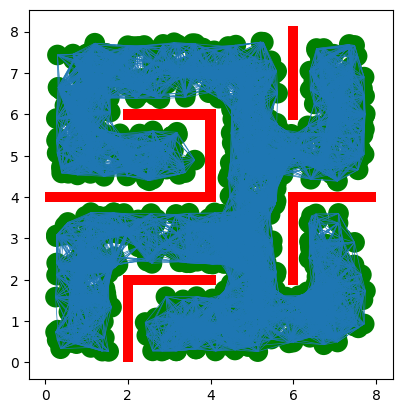

In [ ]:
from matplotlib import collections  as mc
import pylab as pl

fig, ax = plt.subplots()
ax.set_xlim(liminf_X, limsup_X)
ax.set_ylim(liminf_Y, limsup_Y)

for i in range(len(obstacles)):
  ax.add_patch(Rectangle(obstacles[i].pos, obstacles[i].width, obstacles[i].height,
             facecolor = 'red',
             fill=True))


circle_patch = Circle(x_init, radio_robot, facecolor='blue')
ax.add_patch(circle_patch)

# Plotear los vértices
for v in V:
    x, y = v
    circle_patch = Circle((x, y), radio_robot, facecolor='green')
    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos

# Plotear las aristas
lc = mc.LineCollection(E, linewidths=.5)
ax.add_collection(lc)
ax.autoscale()



ax.set_aspect('equal')

plt.show()

In [ ]:
Path, distance = optimalPath(V,E, Vecinos,x_init, np.array([0,1]))

id: 750


ValueError: ignored

In [ ]:
a=np.array([5.354518028490449, 1.6277854446529645])
b=np.array([6.354364549300666, 0.7889440173821217])
np.linalg.norm(a-b)

1.305123750945511

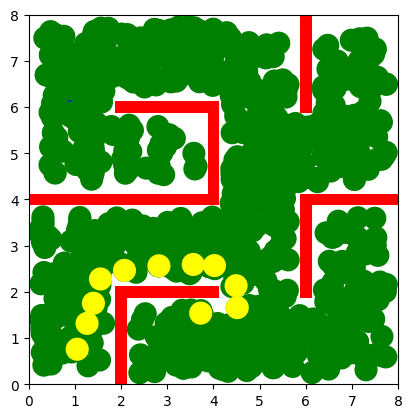

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(liminf_X, limsup_X)
ax.set_ylim(liminf_Y, limsup_Y)

for i in range(len(obstacles)):
  ax.add_patch(Rectangle(obstacles[i].pos, obstacles[i].width, obstacles[i].height,
             facecolor = 'red',
             fill=True))


circle_patch = Circle(x_init, radio_robot, facecolor='blue')
ax.add_patch(circle_patch)

# Plotear los vértices
for v in V:
    x, y = v
    circle_patch = Circle((x, y), radio_robot, facecolor='green')
    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos

# Plotear las aristas
i=0
#for u, v in E:
    #print(i, end=' \r')
    #x1, y1 = u
    #x2, y2 = v
    #plt.plot([x1, x2], [y1, y2], 'b-')  # 'b-' representa líneas azules
    #i+=1

for v in Path:
    x, y = v
    circle_patch = Circle((x, y), radio_robot, facecolor='yellow')
    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos



ax.set_aspect('equal')

plt.show()

**Prueba Algoritmo Caso extremo**

In [ ]:
obstacles = []
obstacles.append(Obstacle((2.5,0), 6, 3.3))
obstacles.append(Obstacle((2.5, 4), 6, 6))

In [ ]:
samples = 1000
V,E, Vecinos = RRG_algorithm(x_init, samples,radio_robot,0.8)

In [ ]:
print(len(V))
print(len(E))
#print(V)
#print(E)

1000
30884


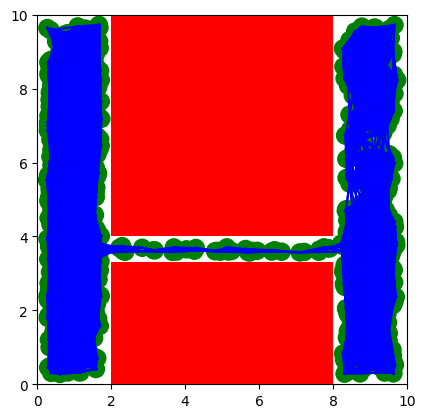

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(liminf_X, limsup_X)
ax.set_ylim(liminf_Y, limsup_Y)

for i in range(len(obstacles)):
  ax.add_patch(Rectangle(obstacles[i].pos, obstacles[i].width, obstacles[i].height,
             facecolor = 'red',
             fill=True))


circle_patch = Circle(x_init, radio_robot, facecolor='blue')
ax.add_patch(circle_patch)

# Plotear los vértices
for v in V:
    x, y = v
    circle_patch = Circle((x, y), radio_robot, facecolor='green')
    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos

# Plotear las aristas
i=0
for u, v in E:
    print(i, end=' \r')
    x1, y1 = u
    x2, y2 = v
    plt.plot([x1, x2], [y1, y2], 'b-')  # 'b-' representa líneas azules
    i+=1



ax.set_aspect('equal')

plt.show()



# Entrenamiento

Generación de tuplas

In [ ]:
All_TuplesX=[]
All_TuplesY=[]

In [ ]:
for i in range(len(All_Paths)):
  for k in range(len(All_Paths[i])):
    #print(All_Paths[i][k]," ", All_Paths[i][-1])
    All_TuplesX.append([All_Paths[i][k], All_Paths[i][-1]])
    if(k < len(All_Paths[i])-1):
      All_TuplesY.append(All_Paths[i][k+1])
    else:
      All_TuplesY.append(All_Paths[i][k])

In [ ]:
All_TuplesX =[[[float(elemento) for elemento in tupla] for tupla in sublista] for sublista in All_TuplesX]
lista_combinada=[]
for sublistas in All_TuplesX:
    sublista_combinada = []
    for sublista in sublistas:
        sublista_combinada.extend(sublista)
    lista_combinada.append(sublista_combinada)
All_TuplesX = lista_combinada
All_TuplesY = [[float(elemento) for elemento in tupla] for tupla in All_TuplesY]
print(All_TuplesX[0:10])
print(All_TuplesY[0])

[[1.0523528875907853, 0.7584937909327754, 3.6845811707595244, 1.4512366124892682], [1.324216191600773, 1.4793365926719713, 3.6845811707595244, 1.4512366124892682], [1.51291231137191, 1.984264989335928, 3.6845811707595244, 1.4512366124892682], [1.551314825637954, 2.25418551699654, 3.6845811707595244, 1.4512366124892682], [1.927852748847671, 2.460624374753451, 3.6845811707595244, 1.4512366124892682], [2.3033085838512752, 2.447066660361959, 3.6845811707595244, 1.4512366124892682], [3.0578452052015357, 2.4703835842821715, 3.6845811707595244, 1.4512366124892682], [3.8397982412976392, 2.4929687754074137, 3.6845811707595244, 1.4512366124892682], [4.421917961324214, 2.3421184001628133, 3.6845811707595244, 1.4512366124892682], [4.47266510262236, 1.760802270504004, 3.6845811707595244, 1.4512366124892682]]
[1.324216191600773, 1.4793365926719713]


In [ ]:
print(len(All_TuplesX))
print(len(All_TuplesY))

24944
24944


In [ ]:
import random
def get_training_data(Lista_TuplasX,Lista_TuplasY, s1,s2,s3):

  # Calcular el número de elementos para cada sublista
  n = len(Lista_TuplasX)
  n1 = int(n * s1)
  n2 = int(n * s2)
  n3 = n - n1 - n2

  Enumeracion=[]
  for i in range(n):
    Enumeracion.append(i)


  # Mezclar los elementos de la lista de forma aleatoria
  random.shuffle(Enumeracion)

  # Particionar la lista en tres sublistas
  sublista1X,sublista1Y = set_sublist(Lista_TuplasX,Lista_TuplasY, Enumeracion,0, n1)
  sublista2X,sublista2Y = set_sublist(Lista_TuplasX,Lista_TuplasY, Enumeracion,n1, n1+n2)
  sublista3X,sublista3Y = set_sublist(Lista_TuplasX,Lista_TuplasY, Enumeracion,n1+n2, n)

  return sublista1X,sublista1Y,sublista2X,sublista2Y, sublista3X,sublista3Y

def set_sublist(Lista_TuplasX,Lista_TuplasY, Enum,start, end):
  subX=[]
  subY=[]
  for i in Enum[start:end]:
    subX.append(Lista_TuplasX[i])
    subY.append(Lista_TuplasY[i])

  return subX,subY

In [ ]:
X_train, Y_train, X_test, Y_test, X_act, Y_act =get_training_data(All_TuplesX,All_TuplesY, 0.85,0.10,0.5)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(X_act))

21202
2494
1248


In [ ]:
print(X_train[0])
print(Y_train[0])

[7.398409016843264, 6.247418851355464, 7.398745155243019, 6.324014995978162]
[7.398745155243019, 6.324014995978162]


## Tensor Flow

In [ ]:
import tensorflow as tf
import keras as keras
from keras.layers import PReLU
from keras import layers, losses, models
from keras.models import Model
import numpy as np

Modelo

In [ ]:
mlp = models.Sequential([
  layers.Dense(128, activation=PReLU()),
	layers.Dropout(0.25),
  layers.Dense(64),
	layers.Activation(activation=PReLU()),
	layers.Dropout(0.25),
  layers.Dense(32),
	layers.Dropout(0.25),
	layers.Activation(activation=PReLU()),
  layers.Dense(2),
	#layers.Activation(activation=PReLU()),
])

In [ ]:
samples = 800
train_input, train_targets = X_train, Y_train
test_input, test_targets  = X_test, Y_test

#print("Shape of train input: ", train_input.shape)
#print("Shape of test input: ", test_input.shape)
#print("Shape of train targets: ", train_targets.shape)
#print("Shape of test targets: ", test_targets.shape)

In [ ]:
print(train_input[1])
print(train_targets[1])

[3.250148015403255, 2.6353459447588383, 1.7449714850951021, 3.0510523403780465]
[3.0591465552596837, 2.718097032536602]


Entrenamiento del modelo de planificación, se guarda el modelo cuyo valor en la pérdida de validación sea menor.

In [ ]:
epochs = 4000
obs_name = 'obs1'
vicinity = 'v1'

models_path = '/content/gdrive/MyDrive/SST_DATA/DDR_SECOND_ORDER/models/'
save_file_path = models_path+'trained_model_'+obs_name +'_'+vicinity+'_'+str(samples)+'_samples_'+str(epochs)+'_epochs.h5'

# Save the best model only wrt validation loss
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=save_file_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


# Loss and Optimizer
mlp.compile(#loss=tf.keras.losses.MeanAbsoluteError(),
      loss=tf.keras.losses.MeanSquaredError(),
			optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
	 		#optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.0005)
			#optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.0005)
			#,metrics=['accuracy']
			)


# Training
history = mlp.fit(x = train_input,
					y = train_targets,
					validation_data=(test_input, test_targets),
					batch_size=128,
					epochs=epochs,
					validation_split=0.05,
					verbose=2,
					callbacks=[model_checkpoint_callback]
)

Epoch 1/4000
166/166 - 3s - loss: 3.0502 - val_loss: 0.3550 - 3s/epoch - 16ms/step
Epoch 2/4000


KeyboardInterrupt: ignored

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)

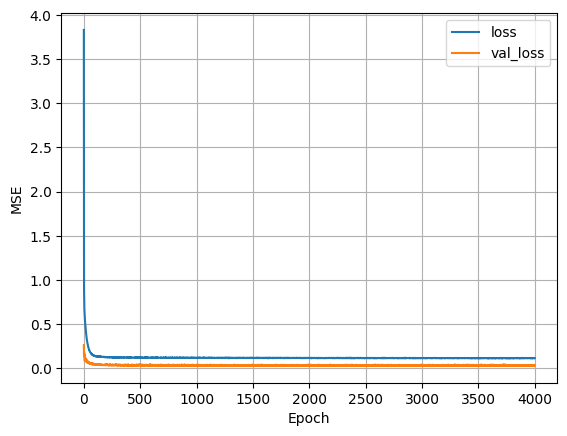

In [ ]:
plot_loss(history)

## Planificación

En caso de querer utilizar los modelos guardados

In [ ]:
model_path = '/content/gdrive/MyDrive/SST_DATA/DDR_SECOND_ORDER/models/trained_model_obs1_v1_700_samples_4000_epochs.h5'
mlp = keras.models.load_model(model_path)

Inferencia haciendo uso de la red

In [ ]:
X_test=test_input

In [ ]:
import copy

# Outputs
start= [3,5,7,7]
last= [100,100,100,100]

Path=[]

while(np.linalg.norm(np.array([start[0],start[1]])-np.array([last[0],last[1]]))>=0.01):
  new_controls = mlp.predict([start])[0]
  print(new_controls)
  last=copy.deepcopy(start)
  start[0]=float(new_controls[0])
  start[1]=float(new_controls[1])
  print(start)
  Path.append([start[0],start[1]])



1/1 [==============================] - 0s 315ms/step
[2.7417085 5.448443 ]
[2.741708517074585, 5.4484429359436035, 7, 7]
1/1 [==============================] - 1s 536ms/step
[2.473161  5.8565016]
[2.473160982131958, 5.856501579284668, 7, 7]
1/1 [==============================] - 0s 64ms/step
[2.4592152 6.2057867]
[2.4592151641845703, 6.20578670501709, 7, 7]
1/1 [==============================] - 0s 44ms/step
[2.7981067 6.3994646]
[2.7981066703796387, 6.3994646072387695, 7, 7]
1/1 [==============================] - 0s 49ms/step
[3.2737284 6.439761 ]
[3.273728370666504, 6.439761161804199, 7, 7]
1/1 [==============================] - 0s 37ms/step
[3.6677413 6.3039503]
[3.667741298675537, 6.303950309753418, 7, 7]
1/1 [==============================] - 0s 46ms/step
[3.9812417 6.179718 ]
[3.9812417030334473, 6.179718017578125, 7, 7]
1/1 [==============================] - 0s 41ms/step
[4.425438  6.1212406]
[4.425437927246094, 6.121240615844727, 7, 7]
1/1 [==============================] - 0s 

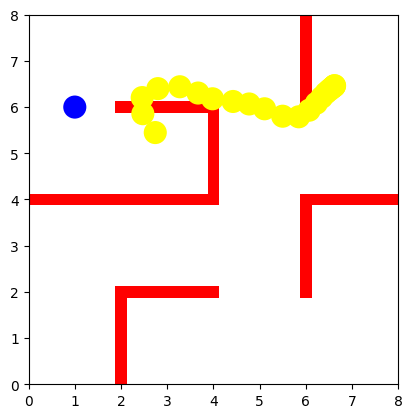

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(liminf_X, limsup_X)
ax.set_ylim(liminf_Y, limsup_Y)

for i in range(len(obstacles)):
  ax.add_patch(Rectangle(obstacles[i].pos, obstacles[i].width, obstacles[i].height,
             facecolor = 'red',
             fill=True))


#circle_patch = Circle(x_init, radio_robot, facecolor='blue')
#ax.add_patch(circle_patch)

# Plotear los vértices
#for v in V:
#    x, y = v
#    circle_patch = Circle((x, y), radio_robot, facecolor='green')
#    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos

# Plotear las aristas
i=0
#for u, v in E:
    #print(i, end=' \r')
    #x1, y1 = u
    #x2, y2 = v
    #plt.plot([x1, x2], [y1, y2], 'b-')  # 'b-' representa líneas azules
    #i+=1

for v in Path:
    x, y = v
    circle_patch = Circle((x, y), radio_robot, facecolor='yellow')
    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos



ax.set_aspect('equal')

plt.show()

In [ ]:
print(Path)

[[2.532729387283325, 5.498368740081787], [2.336850643157959, 5.7180657386779785], [2.1793692111968994, 5.936888217926025], [2.3170182704925537, 6.288452625274658], [2.844977617263794, 6.531954288482666], [3.6062748432159424, 6.554252624511719], [4.359204292297363, 6.418210983276367], [4.868812561035156, 6.113880634307861], [5.4194746017456055, 5.815207481384277], [5.920828342437744, 5.811471939086914], [6.200841903686523, 5.886032581329346], [6.407277584075928, 5.9999189376831055], [6.560427665710449, 6.1017866134643555], [6.645362854003906, 6.149326801300049], [6.683510780334473, 6.167459964752197], [6.700484275817871, 6.173965930938721], [6.707923889160156, 6.176167964935303], [6.711103439331055, 6.176939964294434], [6.712441921234131, 6.177219390869141], [6.713000297546387, 6.177323341369629], [6.713231086730957, 6.177363395690918], [6.713326454162598, 6.1773786544799805], [6.71336555480957, 6.177384853363037], [6.713381767272949, 6.177387237548828], [6.713388442993164, 6.1773881912

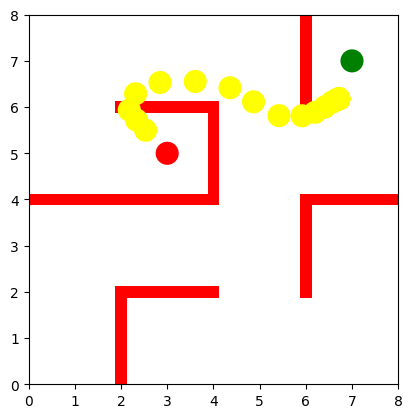

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(liminf_X, limsup_X)
ax.set_ylim(liminf_Y, limsup_Y)

for i in range(len(obstacles)):
  ax.add_patch(Rectangle(obstacles[i].pos, obstacles[i].width, obstacles[i].height,
             facecolor = 'red',
             fill=True))


circle_patch = Circle((3,5), radio_robot, facecolor='red')
ax.add_patch(circle_patch)


circle_patch = Circle((start[2],start[3]), radio_robot, facecolor='green')
ax.add_patch(circle_patch)



# Plotear los vértices
#for v in V:
#    x, y = v
#    circle_patch = Circle((x, y), radio_robot, facecolor='green')
#    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos


for v in Path:
    x, y = v
    circle_patch = Circle((x, y), radio_robot, facecolor='yellow')
    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos



ax.set_aspect('equal')

plt.show()

# Sklearn

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
clf = MLPRegressor(hidden_layer_sizes=(128,64,32), solver="lbfgs", max_iter=4000, alpha=0)
clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=0, hidden_layer_sizes=(128, 64, 32), max_iter=4000,
             solver='lbfgs')

In [ ]:
import copy

# Outputs
start= [3,5,7,7]
last= [100,100,100,100]

Path=[]

while(np.linalg.norm(np.array([start[0],start[1]])-np.array([last[0],last[1]]))>0.0000001):
  new_controls = clf.predict([start])[0]
  print(new_controls)
  last=copy.deepcopy(start)
  start[0]=float(new_controls[0])
  start[1]=float(new_controls[1])
  print(start)
  Path.append([start[0],start[1]])



[2.55456037 5.28868658]
[2.554560369982729, 5.288686578781919, 7, 7]
[2.10237731 5.67445934]
[2.102377307567118, 5.674459341075481, 7, 7]
[1.8064083  6.17073163]
[1.806408295763143, 6.17073163333216, 7, 7]
[1.85752078 6.5853994 ]
[1.857520779604744, 6.585399400541133, 7, 7]
[2.41723605 6.65718912]
[2.417236052462887, 6.657189115213372, 7, 7]
[3.03242868 6.63711615]
[3.03242867647862, 6.637116154075114, 7, 7]
[3.58355527 6.58084629]
[3.5835552690231998, 6.580846289074538, 7, 7]
[4.04720968 6.54464946]
[4.047209679939185, 6.54464946032274, 7, 7]
[4.47877723 6.48917668]
[4.478777231042207, 6.489176680613806, 7, 7]
[4.86032423 6.31455554]
[4.860324230209716, 6.314555536046695, 7, 7]
[5.20933421 6.19482323]
[5.209334205662569, 6.194823233941847, 7, 7]
[5.53126566 6.04541149]
[5.531265660924569, 6.045411485375354, 7, 7]
[5.81697687 6.03020558]
[5.816976868916479, 6.03020558151818, 7, 7]
[6.05237649 6.0102217 ]
[6.0523764910179985, 6.010221704259807, 7, 7]
[6.26158697 6.07501045]
[6.261586972

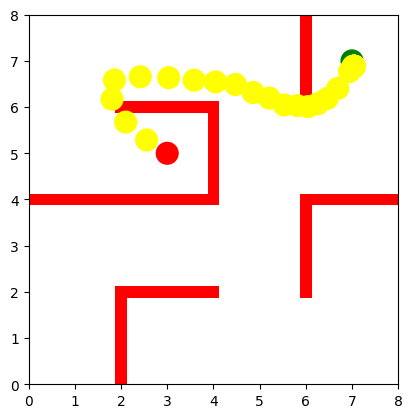

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(liminf_X, limsup_X)
ax.set_ylim(liminf_Y, limsup_Y)

for i in range(len(obstacles)):
  ax.add_patch(Rectangle(obstacles[i].pos, obstacles[i].width, obstacles[i].height,
             facecolor = 'red',
             fill=True))


circle_patch = Circle((3,5), radio_robot, facecolor='red')
ax.add_patch(circle_patch)


circle_patch = Circle((start[2],start[3]), radio_robot, facecolor='green')
ax.add_patch(circle_patch)



# Plotear los vértices
#for v in V:
#    x, y = v
#    circle_patch = Circle((x, y), radio_robot, facecolor='green')
#    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos


for v in Path:
    x, y = v
    circle_patch = Circle((x, y), radio_robot, facecolor='yellow')
    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos



ax.set_aspect('equal')

plt.show()

# Comparacion

In [ ]:
# Leer los datos del archivo de texto
arreglos_leidos = np.loadtxt('Puntos_aleatorios_Neurona.txt')

Puntos_Prueba=[]

# Imprimir los arreglos leídos
print("Arreglos leídos del archivo:")
for arreglo in arreglos_leidos:
    Puntos_Prueba.append(arreglo)
    #print(arreglo)



Arreglos leídos del archivo:


Con drop out

In [ ]:
model_path = '/content/gdrive/MyDrive/SST_DATA/DDR_SECOND_ORDER/models/trained_model_obs1_v1_800_samples_4000_epochs.h5'
mlp = keras.models.load_model(model_path)

In [ ]:
import time

Dropout_STATS=[]
dropout_succes=100
i=0
for punto in Puntos_Prueba:
  # Outputs
  start= []
  start.append(float(punto[0]))
  start.append(float(punto[1]))
  start.append(float(punto[2]))
  start.append(float(punto[3]))
  #print(punto)
  last= [100,100,100,100]
  flag=1

  Path=[]
  dist=0

  inicio = time.time()  # Obtiene el tiempo actual en segundos desde la época (Unix timestamp)

  iter=0
  while(np.linalg.norm(np.array([start[0],start[1]])-np.array([start[2],start[3]]))>=0.75 and iter<50):
    new_controls =  mlp.predict([start], verbose=0)[0]
    #print(new_controls)
    last=copy.deepcopy(start)
    start[0]=float(new_controls[0])
    start[1]=float(new_controls[1])
    #print(start)
    Path.append([start[0],start[1]])
    dist+=distancia_euclidiana(np.array([start[0],start[1]]),np.array([last[0],last[1]]))
    iter+=1

  fin = time.time()  # Obtiene el tiempo actual nuevamente


  if(iter>=50):
    dropout_succes=dropout_succes-1
    flag=0
  else:
    for k in range(len(Path)-1):
      if (collisionFree(Path[k][0], Path[k][1], Path[k+1][0], Path[k+1][1] ,radio_robot)==False):
        dropout_succes=dropout_succes-1
        flag=0
        break

  tiempo_transcurrido = fin - inicio

  Dropout_STATS.append([flag,dist,tiempo_transcurrido])
  print(i)
  i+=1

print("Trayectorias con exito: ",dropout_succes)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Trayectorias con exito:  24


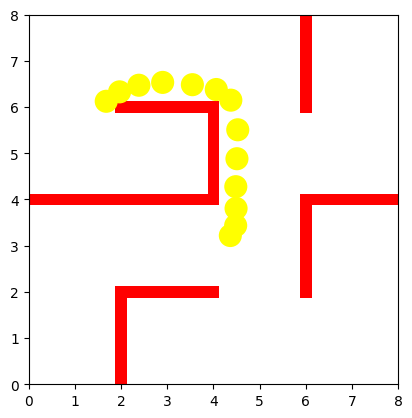

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(liminf_X, limsup_X)
ax.set_ylim(liminf_Y, limsup_Y)

for i in range(len(obstacles)):
  ax.add_patch(Rectangle(obstacles[i].pos, obstacles[i].width, obstacles[i].height,
             facecolor = 'red',
             fill=True))


#circle_patch = Circle(x_init, radio_robot, facecolor='blue')
#ax.add_patch(circle_patch)

# Plotear los vértices
#for v in V:
#    x, y = v
#    circle_patch = Circle((x, y), radio_robot, facecolor='green')
#    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos

# Plotear las aristas
i=0
#for u, v in E:
    #print(i, end=' \r')
    #x1, y1 = u
    #x2, y2 = v
    #plt.plot([x1, x2], [y1, y2], 'b-')  # 'b-' representa líneas azules
    #i+=1

for v in Path:
    x, y = v
    circle_patch = Circle((x, y), radio_robot, facecolor='yellow')
    ax.add_patch(circle_patch)
    #plt.plot(x, y, 'ro', markersize=10)  # 'ro' representa círculos rojos



ax.set_aspect('equal')

plt.show()

In [ ]:
print(Dropout_STATS)

[[0, 5.912946867181977, 2.137895345687866], [0, 3.893848529501101, 6.1581339836120605], [1, 2.4082837829879975, 0.3878748416900635], [0, 2.620152575590599, 0.40448975563049316], [0, 3.5556206635347896, 0.6343700885772705], [0, 5.933165715029722, 0.7807157039642334], [0, 3.427897415783508, 3.8903684616088867], [1, 0.42099357481691696, 0.15477204322814941], [0, 3.0734999160045455, 0.47718024253845215], [0, 7.415278867849429, 0.9265484809875488], [0, 4.276245164151947, 0.8326478004455566], [0, 7.716248337611297, 1.7744176387786865], [1, 6.898660227225354, 0.9255468845367432], [0, 5.182165085618948, 3.9030468463897705], [0, 6.128281047118927, 3.8753910064697266], [1, 0, 3.0279159545898438e-05], [1, 2.8455697041623917, 0.4777987003326416], [1, 1.374787895082912, 0.24368000030517578], [0, 7.389417543383164, 1.2497971057891846], [0, 7.496307620480944, 4.436452865600586], [1, 4.34957676786239, 0.6413047313690186], [0, 9.51248293509229, 3.823880195617676], [0, 3.368139717014897, 0.6277027130126

In [ ]:
# Guardar en un archivo de texto
with open("Dropout_STATS.txt", "w") as archivo:
    for linea in Dropout_STATS:
        texto = " ".join(str(valor) for valor in linea)  # Convertir la línea en una cadena de texto separada por espacios
        archivo.write(texto + "\n")  # Escribir la línea en el archivo, agregando un salto de línea

print("Datos guardados en el archivo.")

Datos guardados en el archivo.


Sin drop out

In [ ]:
model_path = '/content/gdrive/MyDrive/SST_DATA/DDR_SECOND_ORDER/models/trained_model_obs1_v1_700_samples_4000_epochs.h5'
mlp = keras.models.load_model(model_path)

In [ ]:
import time

Sindropout_STATS=[]
sindropout_succes=100
i=0
for punto in Puntos_Prueba:
   # Outputs
  start= []
  start.append(float(punto[0]))
  start.append(float(punto[1]))
  start.append(float(punto[2]))
  start.append(float(punto[3]))
  #print(punto)
  last= [100,100,100,100]
  flag=1

  Path=[]
  dist=0

  inicio = time.time()  # Obtiene el tiempo actual en segundos desde la época (Unix timestamp)


  iter=0
  while(np.linalg.norm(np.array([start[0],start[1]])-np.array([start[2],start[3]]))>=0.75 and iter<50):
    new_controls = mlp.predict([start],verbose=0)[0]
    #print(new_controls)
    last=copy.deepcopy(start)
    start[0]=float(new_controls[0])
    start[1]=float(new_controls[1])
    #print(start)
    Path.append([start[0],start[1]])
    dist+=distancia_euclidiana(np.array([start[0],start[1]]),np.array([last[0],last[1]]))
    iter+=1

  fin = time.time()  # Obtiene el tiempo actual nuevamente


  if(iter>=50):
    sindropout_succes=sindropout_succes-1
    flag=0
  else:
    for k in range(len(Path)-1):
      if (collisionFree(Path[k][0], Path[k][1], Path[k+1][0], Path[k+1][1] ,radio_robot)==False):
        sindropout_succes=sindropout_succes-1
        flag=0
        break

  tiempo_transcurrido = fin - inicio

  Sindropout_STATS.append([flag,dist,tiempo_transcurrido])
  print(i)
  i+=1

print("Trayectorias con exito: ",sindropout_succes)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Trayectorias con exito:  23


In [ ]:
print(Sindropout_STATS)

[[0, 5.900350018798274, 2.9865994453430176], [0, 6.369625646081504, 6.4800004959106445], [1, 2.5270635810261877, 0.6230409145355225], [0, 2.670558487154618, 0.6520977020263672], [0, 3.439820377062122, 2.67494797706604], [0, 6.008527220958343, 1.4026267528533936], [0, 2.5706519130699563, 4.113060474395752], [1, 0.6567234301336284, 0.16631293296813965], [0, 5.2503454338202245, 0.719310998916626], [0, 6.983511021747533, 0.8644037246704102], [1, 4.133608511666046, 0.6410136222839355], [0, 7.383739038345989, 1.026691198348999], [0, 6.653500663348159, 0.890958309173584], [0, 4.323186336939761, 4.6621809005737305], [0, 5.706924860048641, 3.8826000690460205], [1, 0, 1.239776611328125e-05], [1, 3.064559737782765, 0.4499225616455078], [1, 1.4696742528146574, 0.2649085521697998], [0, 7.26470872822103, 3.776595115661621], [0, 7.078032554710991, 4.601628065109253], [1, 4.398514944702241, 0.6239769458770752], [0, 5.674739727391887, 3.9089694023132324], [0, 3.3345708712198427, 0.4762232303619385], [0

In [ ]:
# Guardar en un archivo de texto
with open("Sindropout_STATS.txt", "w") as archivo:
    for linea in Sindropout_STATS:
        texto = " ".join(str(valor) for valor in linea)  # Convertir la línea en una cadena de texto separada por espacios
        archivo.write(texto + "\n")  # Escribir la línea en el archivo, agregando un salto de línea

print("Datos guardados en el archivo.")

Datos guardados en el archivo.


Sklearn

In [ ]:
import copy
import time

Sklearn_STATS=[]

sklearn_succes=100
i=0
for punto in Puntos_Prueba:
  # Outputs
  start= punto
  last= [100,100,100,100]
  flag=1

  Path=[]
  dist=0

  inicio = time.time()  # Obtiene el tiempo actual en segundos desde la época (Unix timestamp)


  iter=0
  while(np.linalg.norm(np.array([start[0],start[1]])-np.array([start[2],start[3]]))>=0.75 and iter<50):
    new_controls = clf.predict([start])[0]
    #print(new_controls)
    last=copy.deepcopy(start)
    start[0]=float(new_controls[0])
    start[1]=float(new_controls[1])
    #print(start)
    Path.append([start[0],start[1]])
    dist+=distancia_euclidiana(np.array([start[0],start[1]]),np.array([last[0],last[1]]))
    iter+=1

  fin = time.time()  # Obtiene el tiempo actual nuevamente


  if(iter>=50):
    sklearn_succes=sklearn_succes-1
    flag=0
  else:
    for k in range(len(Path)-1):
      if (collisionFree(Path[k][0], Path[k][1], Path[k+1][0], Path[k+1][1] ,radio_robot)==False):
        sklearn_succes=sklearn_succes-1
        flag=0
        break

  tiempo_transcurrido = fin - inicio

  Sklearn_STATS.append([flag,dist,tiempo_transcurrido])
  print(i)
  i+=1

print("Trayectorias con exito: ",sklearn_succes)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Trayectorias con exito:  32


In [ ]:
print(Sklearn_STATS)

[[0, 5.842107599911766, 0.0054547786712646484], [0, 20.956534885881705, 0.008522510528564453], [1, 2.469210874231144, 0.0009317398071289062], [0, 3.0146099205543218, 0.0011475086212158203], [0, 2.6464235660106503, 0.0008404254913330078], [1, 6.180658258977112, 0.00186920166015625], [0, 3.0000396587673572, 0.008765697479248047], [1, 0.5275374345524195, 0.00030350685119628906], [0, 3.463079557803253, 0.002273082733154297], [0, 7.471962263591619, 0.004287242889404297], [0, 4.5464443788788165, 0.0026264190673828125], [0, 7.952490091834818, 0.003882884979248047], [0, 7.006652336159998, 0.003477811813354492], [0, 5.026247579969263, 0.0042111873626708984], [0, 6.06746605484725, 0.0038404464721679688], [1, 0, 9.870529174804688e-05], [1, 2.9973289386274953, 0.0012650489807128906], [1, 1.9852668694309552, 0.001672983169555664], [0, 7.798123661424674, 0.005113840103149414], [0, 7.9069005529420995, 0.006462812423706055], [1, 4.754631927479005, 0.0028998851776123047], [0, 21.36538872700048, 0.01047

In [ ]:
# Guardar en un archivo de texto
with open("Sklearn_STATS.txt", "w") as archivo:
    for linea in Sklearn_STATS:
        texto = " ".join(str(valor) for valor in linea)  # Convertir la línea en una cadena de texto separada por espacios
        archivo.write(texto + "\n")  # Escribir la línea en el archivo, agregando un salto de línea

print("Datos guardados en el archivo.")

Datos guardados en el archivo.
